In [1]:
import numpy as np
import matplotlib.pyplot as plt

# One plant and one pollinator.

[Text(0, 0.5, 'Pollinatiors')]

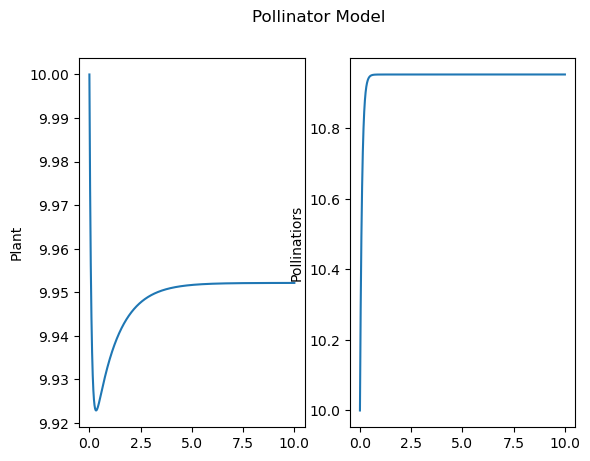

In [5]:
#  Parameters
k1      = 1.0    # Fertilizated eggs per visit
k2      = 1.0    # Energetic transformation constant
sigma   = 1.0    # Meeting probability
mu      = 1.0    # Energetic reward
phi     = 1.0    # Reciprocal of nectar extraction speed
gamma   = 1      # Plant death rate
epsilon = 1      # Regulation rate pollinator
K       = 10      # Carrying capacity

# Time parameters
tsim = 10.0
h    = 0.001
ite  = int(tsim/h)
t    = np.linspace(0, tsim, num = ite + 1)

# Initial conditions
p    = np.zeros(ite + 1)
a    = np.zeros(ite + 1)
p[0] = 10
a[0] = 10

def dp_dt (k1, sigma, gamma, phi, mu, a, p, t):
  return ((k1 * sigma * phi * mu * a * p) / (1 + phi * sigma * mu ** 2 * p)) - gamma * p

def da_dt (k2, K, epsilon,sigma, phi, mu, a, p, t):
  return  epsilon * a * (K - a) + ((k2 * sigma * mu ** 2 * a * p) / (1 + phi * sigma * mu ** 2 * p)) 

for i in range(ite):
  k1p  = dp_dt (k1, sigma, gamma, phi, mu, a[i], p[i], t[i])
  k2p  = dp_dt (k1, sigma, gamma, phi, mu, a[i], p[i] + (h/2) * k1p, t[i] + h/2)
  k3p  = dp_dt (k1, sigma, gamma, phi, mu, a[i], p[i] + (h/2) * k2p, t[i] + h/2)
  k4p  = dp_dt (k1, sigma, gamma, phi, mu, a[i], p[i] + h * k3p, t[i] + h)

  k1a  = da_dt (k2, K, epsilon, sigma, phi, mu, a[i], p[i], t[i])
  k2a  = da_dt (k2, K, epsilon, sigma, phi, mu, a[i] + (h/2) * k1a, p[i] , t[i] + h/2)
  k3a  = da_dt (k2, K, epsilon, sigma, phi, mu, a[i] + (h/2) * k2a, p[i], t[i] + h/2)
  k4a  = da_dt (k2, K, epsilon, sigma, phi, mu, a[i] + h * k3a, p[i], t[i] + h)

  p[i+1] = p[i] + (h/6)*( k1p + 2 * k2p + 2 * k3p + k4p )
  a[i+1] = a[i] + (h/6)*( k1a + 2 * k2a + 2 * k3a + k4a )

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Pollinator Model')
ax1.plot(t, p)
ax1.set(ylabel="Plant")
ax2.plot(t, a)
ax2.set(ylabel="Pollinatiors")

# 1P1P with variations in parameters

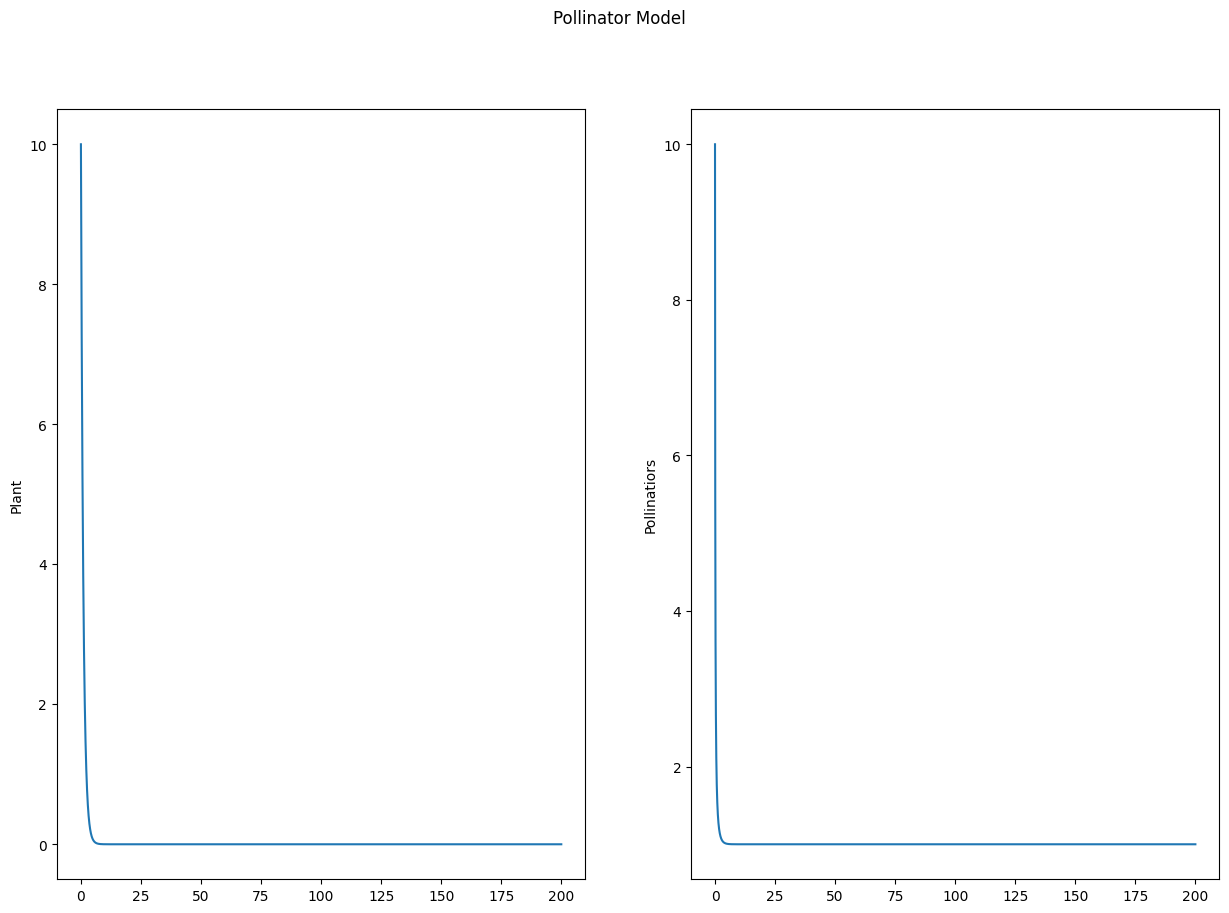

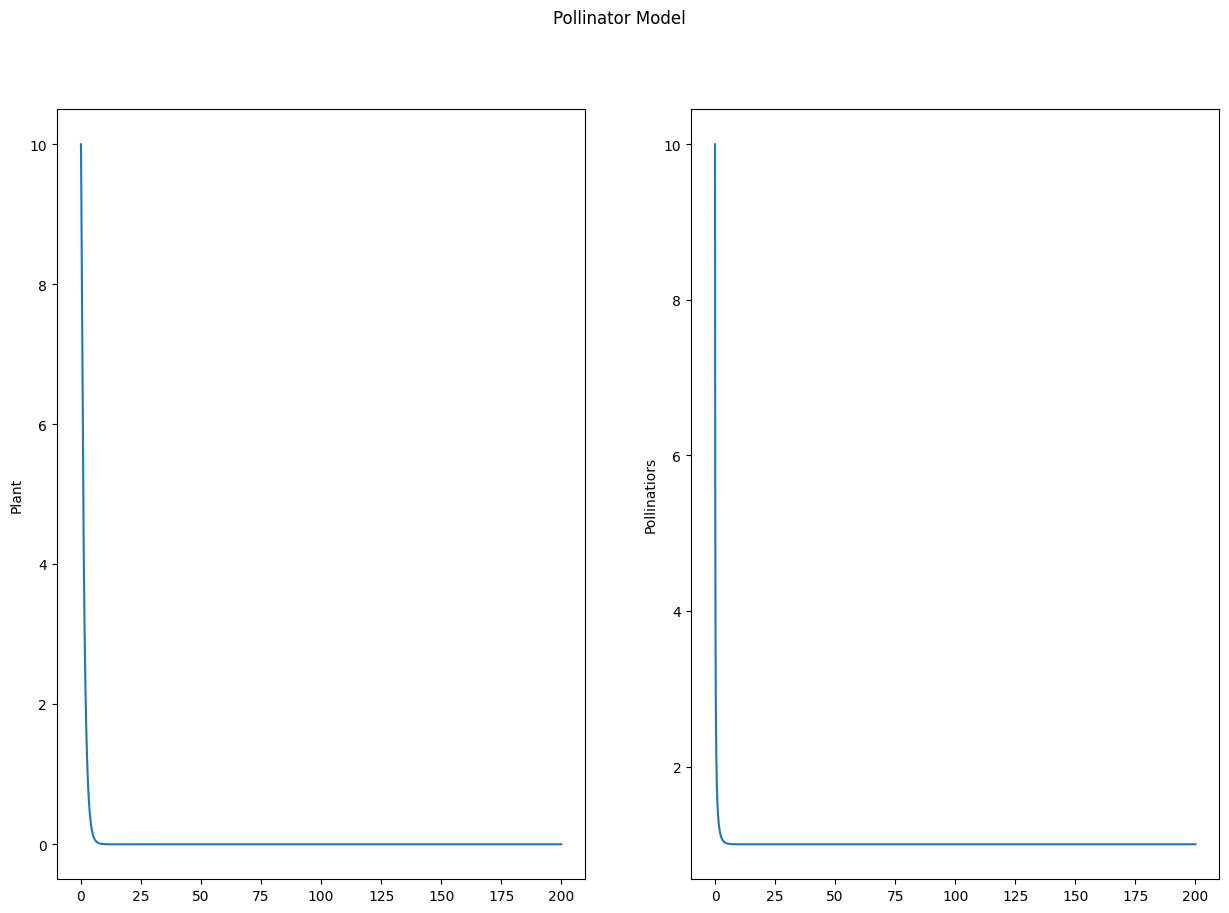

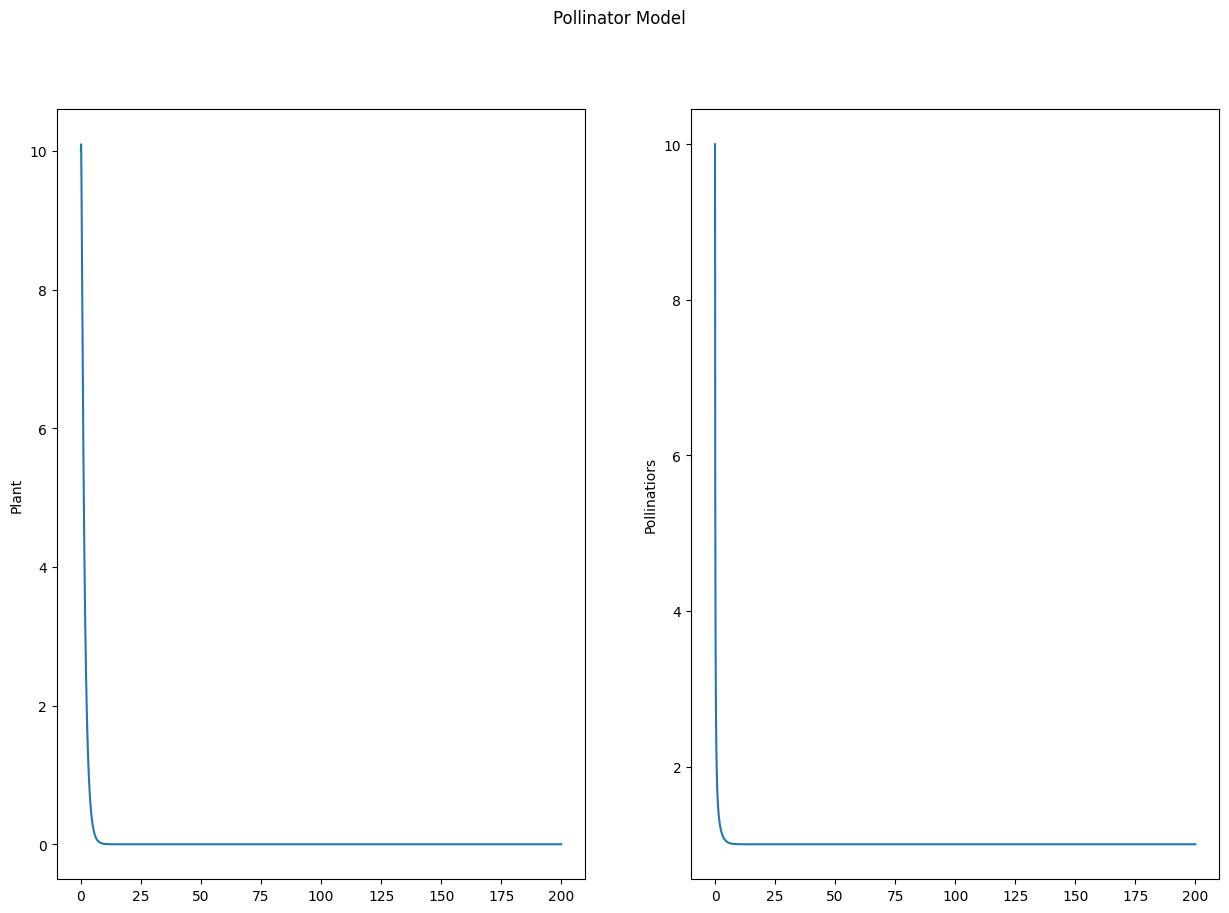

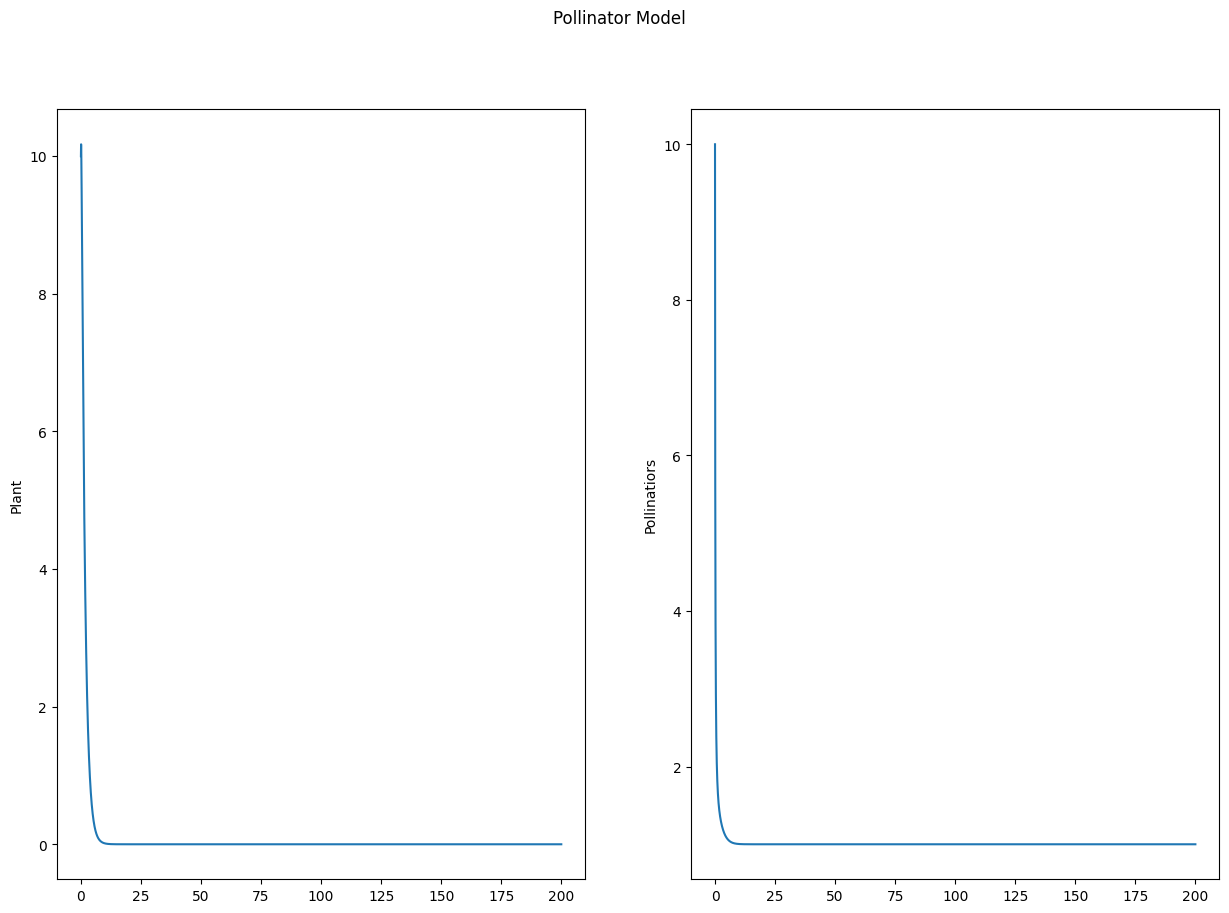

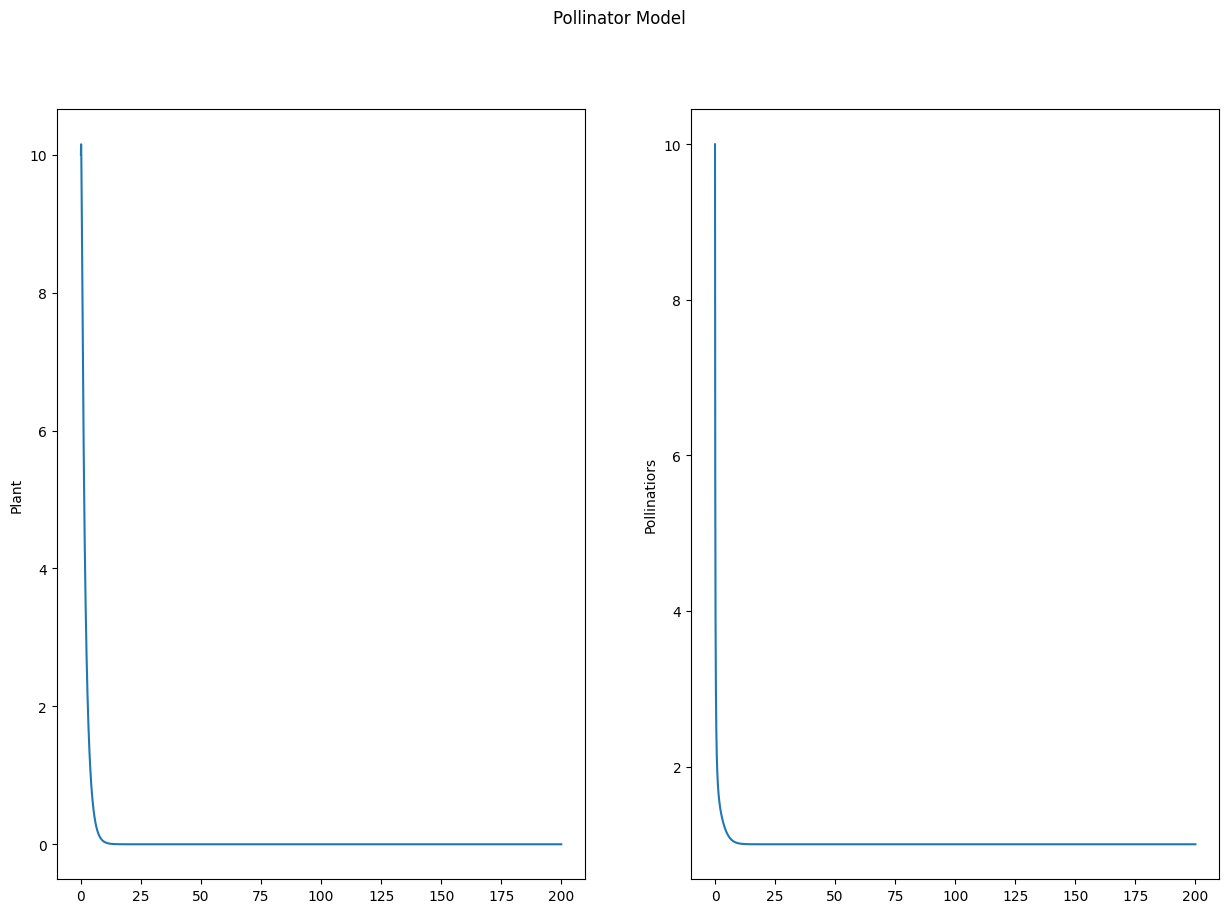

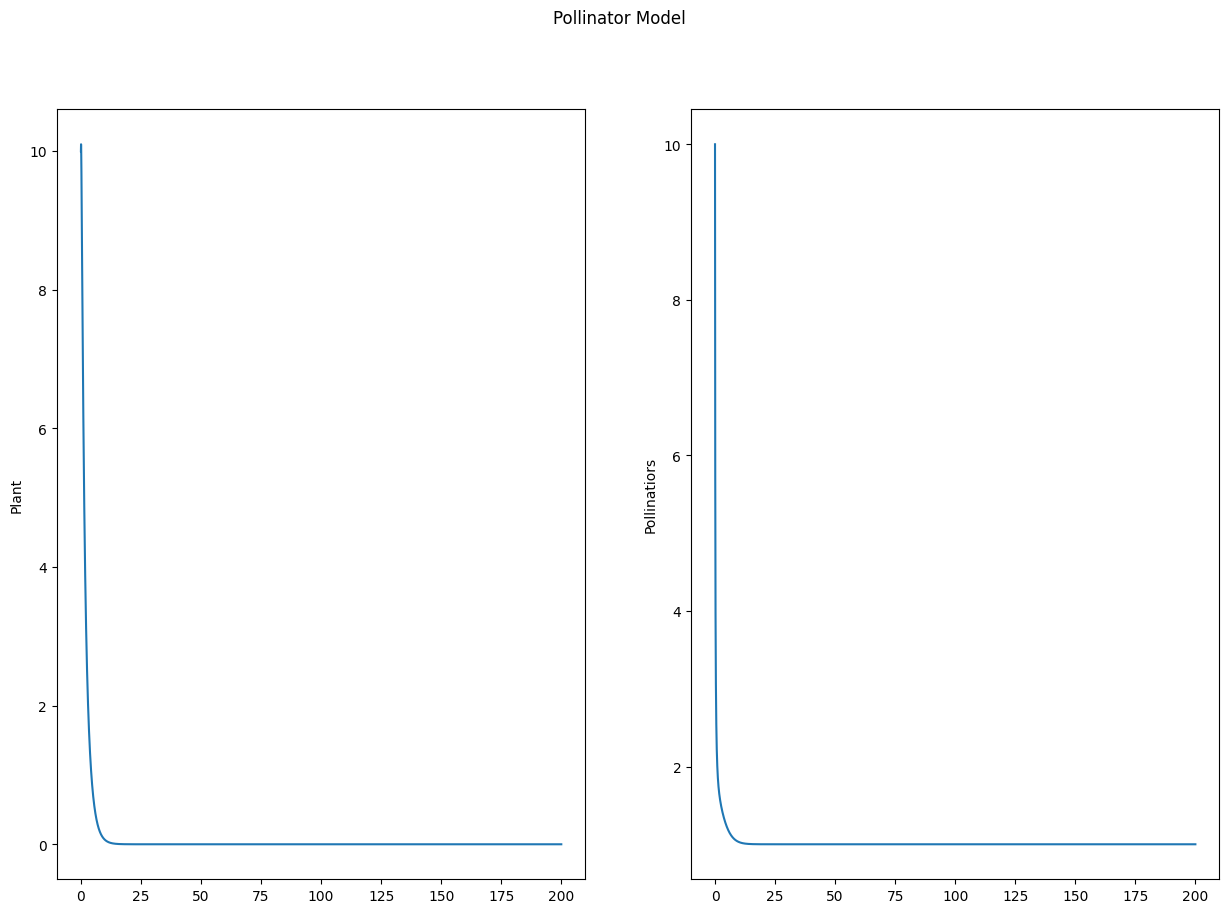

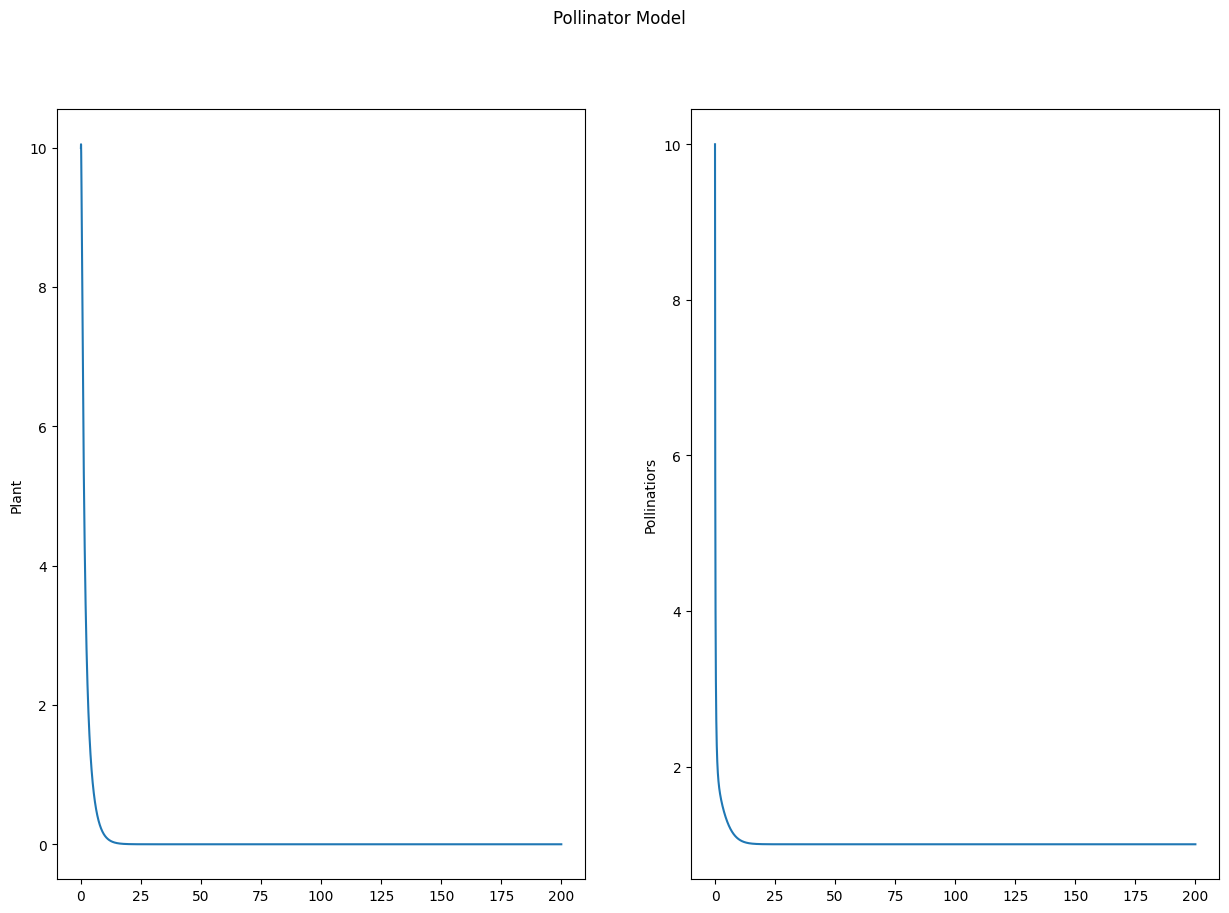

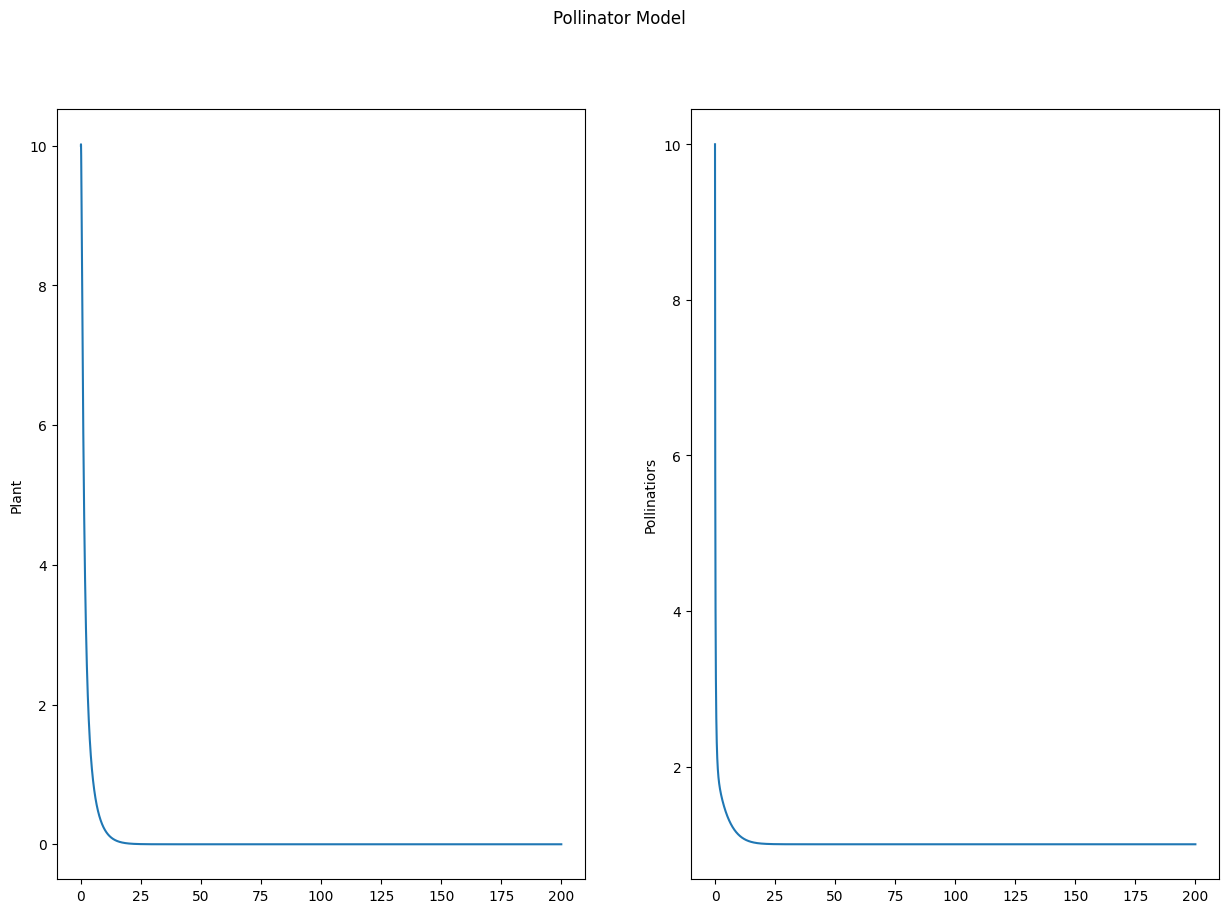

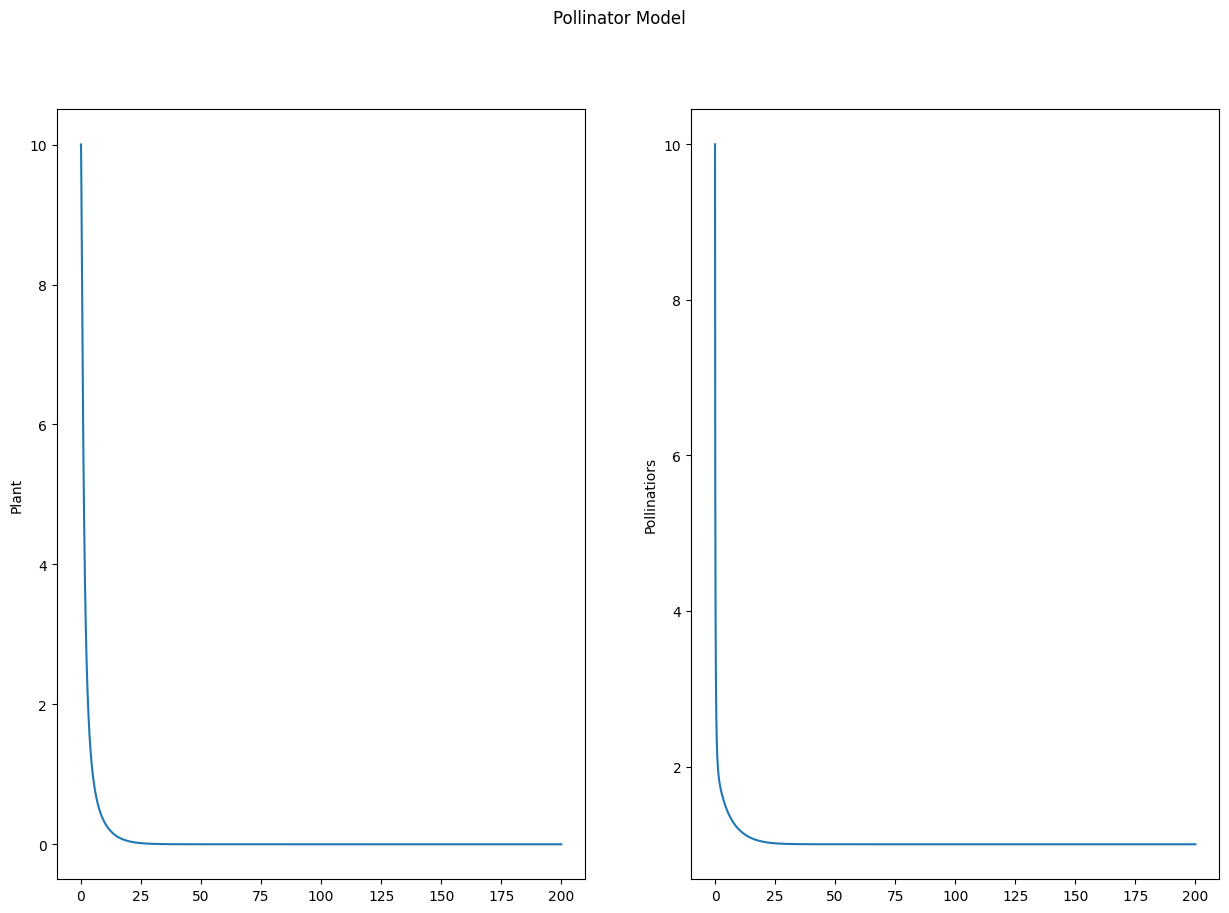

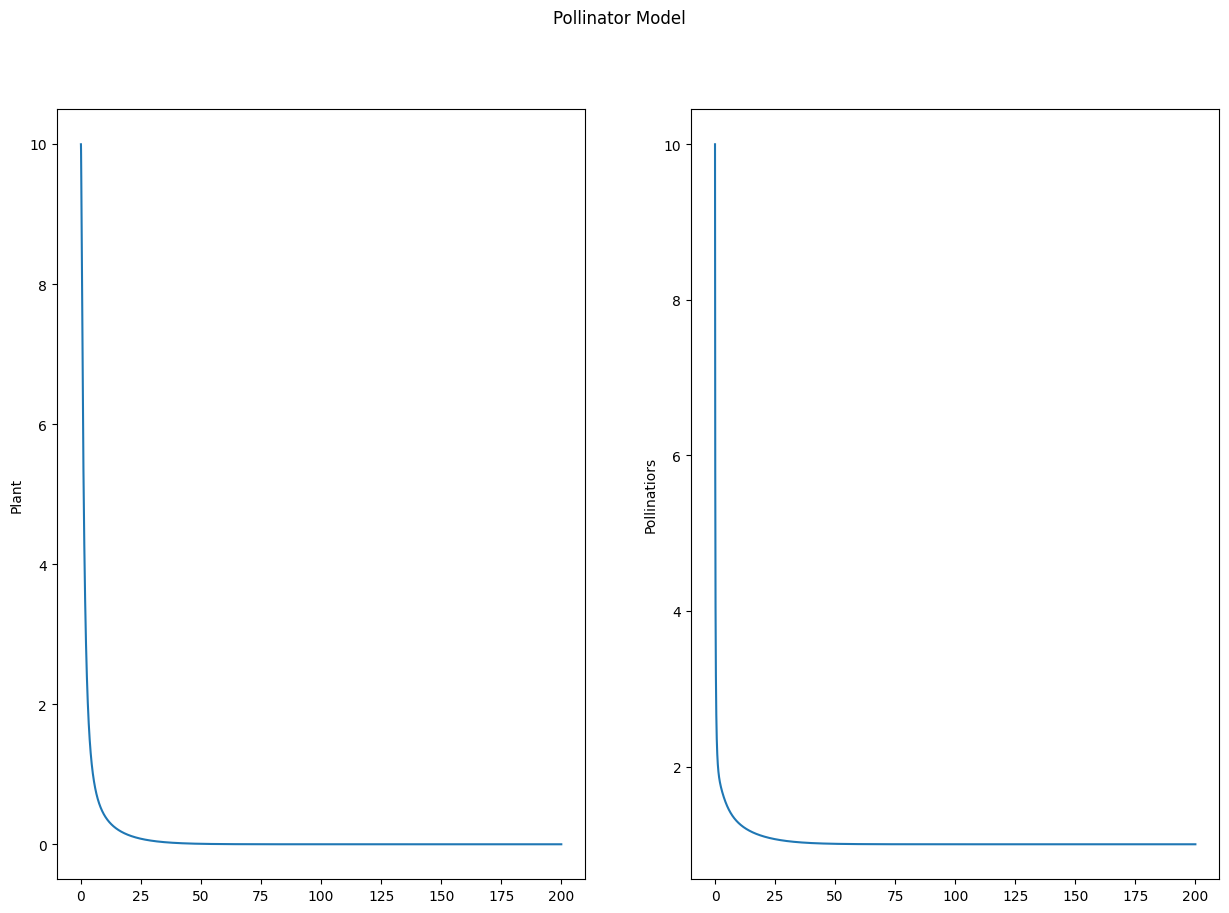

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint

def dp_dt (k1, sigma, phi, gamma, mu, a, p, t):
  return ((k1 * sigma * phi * mu * a * p) / (1 + phi * sigma * mu ** 2 * p)) - gamma * p

def da_dt (k2, K, epsilon,sigma, phi, mu, a, p, t):
  return  epsilon * a * (K - a) + ((k2 * sigma * mu ** 2 * a * p) / (1 + phi * sigma * mu ** 2 * p)) 

# Time parameters
tsim = 200.0
h    = 0.001
ite  = int(tsim/h)
t    = np.linspace(0, tsim, num = ite + 1)

for var in range(10):
  var = var/10 
  #var = var + 1.0
  #  Parameters
  k1      = 1.0    # Fertilizated eggs per visit
  k2      = 1.0    # Energetic transformation constant
  sigma   = 1.0    # Meeting probability
  mu      = var    # Energetic reward
  phi     = 1.0    # Reciprocal of nectar extraction speed
  gamma   = 1.0    # Plant death rate
  epsilon = 1.0    # Regulation rate pollinator
  K       = 1.0    # Carrying capacity

  # Initial conditions
  p    = np.zeros(ite + 1)
  a    = np.zeros(ite + 1)
  #p[0] = randint(1, 200)
  p[0] = 10.0
  #a[0] = randint(1, 200)
  a[0] = 10.0

  for i in range(ite):
    k1p  = dp_dt (k1, sigma, phi, gamma, mu, a[i], p[i], t[i])
    k2p  = dp_dt (k1, sigma, phi, gamma, mu, a[i], p[i] + (h/2) * k1p, t[i] + h/2)
    k3p  = dp_dt (k1, sigma, phi, gamma, mu, a[i], p[i] + (h/2) * k2p, t[i] + h/2)
    k4p  = dp_dt (k1, sigma, phi, gamma, mu, a[i], p[i] + h * k3p, t[i] + h)

    k1a  = da_dt (k2, K, epsilon, sigma, phi, mu, a[i], p[i], t[i])
    k2a  = da_dt (k2, K, epsilon, sigma, phi, mu, a[i] + (h/2) * k1a, p[i] , t[i] + h/2)
    k3a  = da_dt (k2, K, epsilon, sigma, phi, mu, a[i] + (h/2) * k2a, p[i], t[i] + h/2)
    k4a  = da_dt (k2, K, epsilon, sigma, phi, mu, a[i] + h * k3a, p[i], t[i] + h)

    p[i+1] = p[i] + (h/6)*( k1p + 2 * k2p + 2 * k3p + k4p )
    a[i+1] = a[i] + (h/6)*( k1a + 2 * k2a + 2 * k3a + k4a )

  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
  fig.suptitle('Pollinator Model')
  ax1.plot(t, p)
  ax1.set(ylabel="Plant")
  ax2.plot(t, a)
  ax2.set(ylabel="Pollinatiors")
  plt.savefig('Pollinator_'+str(round(k1, 1))+'_'+str(round(k2, 1))+'_'+str(round(sigma, 1))+'_'+str(round(mu, 1))+'_'+str(round(phi, 1))+'_'+str(round(gamma, 1))+'_'+str(round(epsilon, 1))+'_'+str(round(K,1))+'.png')

# Code every varaible are gaussian

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from random import *

def dp_dt (k, sigma, phi, gamma, mu, a, p, t):
  dp = np.zeros(len(p))
  for i in range(len(p)):
    for j in range(len(a)):
      dp[i] = dp[i] + (( sigma[i,j] * phi[i,j] * mu[i,j] * a[j] ) / (1 + phi[i,j] * sigma[i,j] * mu[i,j] ** 2 * p[i]))
    dp[i] = dp[i] - (gamma[i] * p[i])
  return dp

def da_dt (l, K, epsilon,sigma, phi, mu, a, p, t):
  da = np.zeros(len(a))
  for j in range(len(a)):
    for m in range(len(p)):
      da[j] = da[j] + ((sigma[m,j] * mu[m,j] ** 2 ) / (1 + phi[m,j] * sigma[m,j] * mu[m,j] ** 2 * p[m])) * l[m] * p[m] * a[j]
    da[j] = da[j] + epsilon[j] * a[j] *( K[j] - a[j] )
  return  da 

# Time parameters
tsim = 200.0
h    = 0.001
ite  = int(tsim/h)
t    = np.linspace(0, tsim, num = ite + 1)

#  Parameters
N       = 2           # Number of plants
v       = 1.0          # Ratio between plants and pollinators
M       = int(N/v)     # Number of pollinators

mu_k         = 1.0     # Mean pollinators eggs per visit
sigma_k      = 0.0     # Standard deviation pollinators eggs per visit
 
mu_l         = 1.0     # Mean transformation constant
sigma_l      = 0.0     # Standar deviation transformation constant

mu_sigma     = 1.0     # Mean Meeting probability
sigma_sigma  = 0.0     # Standar deviation probability

mu_mu        = 1.0     # Mean Energetic rewind
sigma_mu     = 0.0     # Standar deviation Energetic rewind

mu_phi       = 1.0     # Mean Energetic Reciprocal of nectar extraction speed
sigma_phi    = 0.0     # Standar deviation energetic reciprocal of nectar extraction speed

mu_gamma     = 1.0     # Mean plant death rate
sigma_gamma  = 0.0     # Standar desviation plant death rate

mu_epsilon   = 1.0     # Mean regulation rate pollinator
sigma_epsilon= 0.0     # Standart desviation regulation rate pollinator

mu_K         = 1.0     # Carrying capacity
sigma_K      = 0.0     # Carrying capacity

#  Initialization of vectors
p       = 100*np.random.rand(N)
p_v     = np.zeros(N)
a       = 100*np.random.rand(M)
a_v     = np.zeros(M)
k       = np.random.normal(mu_k, sigma_k, size=(N))
gamma   = np.random.normal(mu_gamma, sigma_gamma, size=(N))
l       = np.random.normal(mu_l, sigma_l, size=(M))
K       = np.random.normal(mu_K, sigma_K, size=(M))
epsilon = np.random.normal(mu_epsilon, sigma_epsilon, size=(M))
sigma   = np.random.normal(mu_sigma, sigma_sigma, size=((N,M)))
mu      = np.random.normal(mu_mu, sigma_mu, size=((N,M)))
phi     = np.random.normal(mu_phi, sigma_phi, size=((N,M)))

for i in range(ite):
    k1p  = dp_dt (k, sigma, phi, gamma, mu, a, p, t[i])
    k2p  = dp_dt (k, sigma, phi, gamma, mu, a, p + (h/2) * k1p, t[i] + h/2)
    k3p  = dp_dt (k, sigma, phi, gamma, mu, a, p + (h/2) * k2p, t[i] + h/2)
    k4p  = dp_dt (k, sigma, phi, gamma, mu, a, p + h * k3p, t[i] + h)

    k1a  = da_dt (k, K, epsilon, sigma, phi, mu, a, p, t[i])
    k2a  = da_dt (k, K, epsilon, sigma, phi, mu, a + (h/2) * k1a, p , t[i] + h/2)
    k3a  = da_dt (k, K, epsilon, sigma, phi, mu, a + (h/2) * k2a, p, t[i] + h/2)
    k4a  = da_dt (k, K, epsilon, sigma, phi, mu, a + h * k3a, p, t[i] + h)

    p = p + (h/6)*( k1p + 2 * k2p + 2 * k3p + k4p )
    a = a + (h/6)*( k1a + 2 * k2a + 2 * k3a + k4a )



KeyboardInterrupt: 

# Debugged parameters

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from random import *

def dp_dt (k, sigma, phi, gamma, mu, a, p, t):
  dp = np.zeros(len(p))
  for i in range(len(p)):
    for j in range(len(a)):
      dp[i] = dp[i] + a[j] 

    dp[i] = dp[i] * (( sigma * phi * mu * k[i] ) / (1 + phi * sigma * mu ** 2 * p[i])) 
    dp[i] = dp[i] - (gamma * p[i])

  return dp

def da_dt (l, K, epsilon,sigma, phi, mu, a, p, t):
  da = np.zeros(len(a))
  for j in range(len(a)):
    for m in range(len(p)):
      da[j] = ((sigma * mu ** 2 ) / (1 + phi * sigma * mu ** 2 * p[m])) * l[j] * p[m] *a[j] 
    

    da[j] = da[j] + epsilon * a[j] *( K - a[j] )
    
  return  da 

# Time parameters
tsim = 200.0
h    = 0.001
ite  = int(tsim/h)
t    = 0

#  Parameters
N       = 1            # Number of plants
v       = 0.2          # Ratio between plants and pollinators
M       = int(N/v)     # Number of pollinators

mu_k         = 1.0     # Mean pollinators eggs per visit
sigma_k      = 0.1     # Standard deviation pollinators eggs per visit
 
mu_l         = 1.0     # Mean transformation constant
sigma_l      = 0.1     # Standar deviation transformation constant

sigma        = 1.0     # Meeting probability

mu           = 1.0     # Energetic rewind

phi          = 1.0     # Reciprocal of nectar extraction speed

gamma        = 1.0     # Plant death rate

epsilon      = 1.0     # Regulation rate pollinator

K            = 1.0     # Carrying capacity

#  Initialization of vectors
p       = 100*np.random.rand(N)
p_v     = np.zeros(N)
a       = 100*np.random.rand(M)
a_v     = np.zeros(M)
k       = np.random.normal(mu_k, sigma_k, size=(N))
l       = np.random.normal(mu_l, sigma_l, size=(M))


for i in range(ite):
    k1p  = dp_dt (k, sigma, phi, gamma, mu, a, p              , t)
    k2p  = dp_dt (k, sigma, phi, gamma, mu, a, p + (h/2) * k1p, t + h/2)
    k3p  = dp_dt (k, sigma, phi, gamma, mu, a, p + (h/2) * k2p, t + h/2)
    k4p  = dp_dt (k, sigma, phi, gamma, mu, a, p + h * k3p    , t + h)
                
    k1a  = da_dt (l, K, epsilon, sigma, phi, mu, a              , p, t)
    k2a  = da_dt (l, K, epsilon, sigma, phi, mu, a + (h/2) * k1a, p, t + h/2)
    k3a  = da_dt (l, K, epsilon, sigma, phi, mu, a + (h/2) * k2a, p, t + h/2)
    k4a  = da_dt (l, K, epsilon, sigma, phi, mu, a + h * k3a    , p, t + h)

    p  = p + (h/6)*( k1p + 2 * k2p + 2 * k3p + k4p )
    a  = a + (h/6)*( k1a + 2 * k2a + 2 * k3a + k4a )
    t +=1



KeyboardInterrupt: 

# Debugged parameters (optimized)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from random import *

def dp_dt (k, sigma, phi, gamma, mu, a, p, t):
  dp   = np.zeros(len(p))

  sum_a = np.sum(a)
  
  for i in range(len(p)):

    dp[i] = sum_a * (( sigma * phi * mu * k[i] * p[i]) / (1 + phi * sigma * mu ** 2 * p[i])) - gamma  * p[i]

  return dp

def da_dt (l, K, epsilon,sigma, phi, mu, a, p, t):
  
  c = 0
  
  for m in range(len(p)):
    c += ((sigma * mu ** 2 ) / (1 + phi * sigma * mu ** 2 * p[m])) *  p[m]

  da = np.ones(len(a))*c

  for j in range(len(a)):
    da[j] = da[j] * l[j] * a[j]
    da[j] = da[j] + epsilon * a[j] *( K - a[j] )
    
  return  da 



# Time parameters
tsim = 200.0
h    = 0.001
ite  = int(tsim/h)
t    = 0

#  Parameters
N       = 1            # Number of plants
v       = 0.2          # Ratio between plants and pollinators
M       = int(N/v)     # Number of pollinators

mu_k         = 1.0     # Mean pollinators eggs per visit
sigma_k      = 0.1     # Standard deviation pollinators eggs per visit
 
mu_l         = 1.0     # Mean transformation constant
sigma_l      = 0.1     # Standar deviation transformation constant

sigma        = 1.0     # Meeting probability

mu           = 1.0     # Energetic rewind

phi          = 1.0     # Reciprocal of nectar extraction speed

gamma        = 1.0     # Plant death rate

epsilon      = 1.0     # Regulation rate pollinator

K            = 1.0     # Carrying capacity

#  Initialization of vectors
p       = 100*np.random.rand(N)
p_v     = np.zeros(N)
a       = 100*np.random.rand(M)
a_v     = np.zeros(M)
k       = np.random.normal(mu_k, sigma_k, size=(N))
l       = np.random.normal(mu_l, sigma_l, size=(M))


for i in range(ite):
    k1p  = dp_dt (k, sigma, phi, gamma, mu, a, p              , t)
    k2p  = dp_dt (k, sigma, phi, gamma, mu, a, p + (h/2) * k1p, t + h/2)
    k3p  = dp_dt (k, sigma, phi, gamma, mu, a, p + (h/2) * k2p, t + h/2)
    k4p  = dp_dt (k, sigma, phi, gamma, mu, a, p + h * k3p    , t + h)
                
    k1a  = da_dt (l, K, epsilon, sigma, phi, mu, a              , p, t)
    k2a  = da_dt (l, K, epsilon, sigma, phi, mu, a + (h/2) * k1a, p, t + h/2)
    k3a  = da_dt (l, K, epsilon, sigma, phi, mu, a + (h/2) * k2a, p, t + h/2)
    k4a  = da_dt (l, K, epsilon, sigma, phi, mu, a + h * k3a    , p, t + h)

    p   += (h/6)*( k1p + 2 * k2p + 2 * k3p + k4p )
    a   += (h/6)*( k1a + 2 * k2a + 2 * k3a + k4a )

    t   += h